In [81]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import sys
sys.path.append('../src/')

from utils import load_topic_bibcode_h5py

In [48]:
infile = "../models/example_experiment/topic_model30/viz_data.hdf5"
pca_n_components = 3
tsne_n_components = 2

In [49]:
df = load_topic_bibcode_h5py(infile)

In [50]:
embedding = df.iloc[:, 1:].values
print(embedding.shape)

(6015, 30)


In [51]:
um = umap.UMAP()
u = um.fit_transform(embedding.T)

In [55]:
pca = PCA(n_components=pca_n_components)
pca.fit(embedding)

PCA(n_components=3)

In [82]:
pca_scaled = MinMaxScaler().fit_transform(pca.components_.T) + 1

ValueError: 'c' argument has 30 elements, which is not acceptable for use with 'x' with size 30, 'y' with size 30.

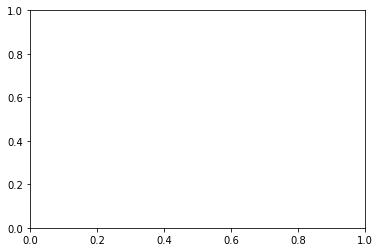

In [77]:
plt.scatter(u[:,0], u[:,1], c=pca_scaled)

In [54]:
pca.components_.shape

(3, 30)

In [7]:
tsne = TSNE(n_components=tsne_n_components)
tsne.fit(pca.components_.T)
print(tsne.embedding_.T.shape)

(2, 30)


In [20]:
um = umap.UMAP(n_components=tsne_n_components)
tsne.fit(pca.components_.T)
print(tsne.embedding_.T.shape)

(2, 30)


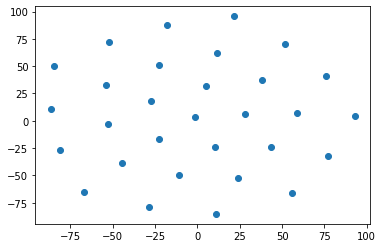

In [78]:
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])

In [70]:
tsne.embedding_.shape

(6015, 2)